In [53]:
from scipy.fft import rfft
from utils import ConfigSettings
from datasets import EliaSolarDataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
cf = ConfigSettings(config_path='config.ini')

In [55]:
solar_dataset = EliaSolarDataset(
        csv_path=cf.data.file_path,
        datetime_column='DateTime',
        target_column="Corrected Upscaled Measurement [MW]",
        context_length=cf.model.context_length,
        frequency=cf.data.frequency,
        train_test_split_year=cf.data.train_test_split_year,
        train_val_split_year=cf.data.train_val_split_year,)

In [56]:
df = solar_dataset.get_dataframe(preprocessed=True)

In [57]:
df.head()

,DateTime,Corrected Upscaled Measurement [MW]
0,2012-02-01 00:00:00,0.0
1,2012-02-01 01:00:00,0.0
2,2012-02-01 02:00:00,0.0
3,2012-02-01 03:00:00,0.0
4,2012-02-01 04:00:00,0.0


In [58]:
row = np.array(solar_dataset.data[10010, :, :].flatten())

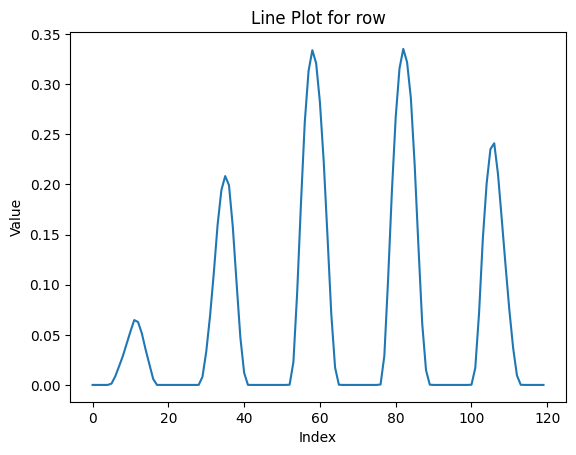

In [59]:
plt.plot(row)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plot for row')
plt.show()


In [60]:
fourier = rfft(row)

c:\Repositories\OpenUniversiteit\dne\code\venv\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Repositories\OpenUniversiteit\dne\code\venv\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


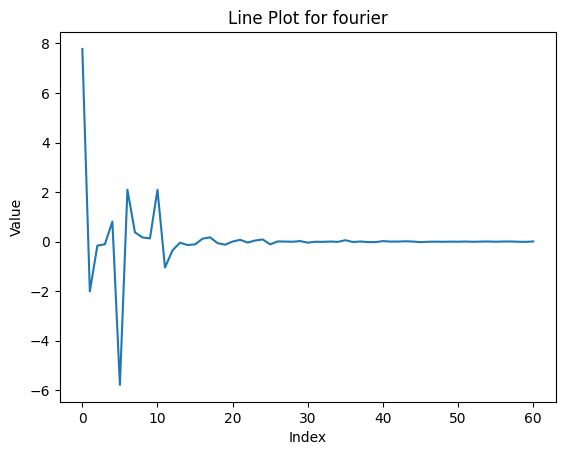

In [61]:
plt.plot(fourier)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plot for fourier')
plt.show()